In [1]:
# Code used to create Figure 4.4b in Ch. 4 of Hourly load profile of Primary schools (lineplot mean & stdev) 
# Created 7Jul23 - for thesis VF submission
# Based on Jupyter notebook: prischools_load_profile_utavg

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # maybe don't need this

cwd = os.getcwd()
cwd

os.chdir("/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files")
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files'

In [2]:
# Plot all means of Primary schools 
average_data = {}

filenames = {entry for entry in os.listdir(".") if entry.endswith(".csv") \
if ("Primary" in entry) or ("primary" in entry)}
# ^above lines is what changes between institution type in code 
for filename in filenames:
    data = pd.read_csv(filename, usecols = ["Timestamp","Consumption"])
    data["Timestamp"] = pd.to_datetime(data["Timestamp"],format="%d/%m/%Y %H:%M")
    data["Consumption"] *= 1000 # to convert to Wh
    # data['Consumption'].sum() # check totals if needed
    # Calculate average hourly utilisation
    hrly = data.groupby([data["Timestamp"].dt.hour]).Consumption.mean()
    average_data[filename.split("_gaps_filled")[0].replace("_", " ")] = hrly

# Creates df of Hour as index and sites as column, after calculating avg utilisation
results_frame = pd.DataFrame(average_data)
results_frame.round(2)

,Mlilo Primary School,Makonjeni Primary School,Kawalash Primary School,Garbatula Primary Boarding,Dzombo Primary School,Galukani Primary School,Dadachabasa Primary School,Mbilini Primary School,Merti Muslim Primary School,Balaga Primary School,...,Mwele Primary School,AIC Nadoto Primary School,Nyango Primary School,Gideon Mosi Primary School,Kombola primary school,Daaba Primary School,Mrima Wa Kuku Primary School,Mabayani Primary School,Matolani Primary School,Mwanzwani Primary School
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,36.59,56.86,28.87,60.93,19.78,25.47,21.49,14.76,52.56,69.70,...,32.17,25.84,49.15,39.49,23.26,34.66,32.86,61.78,15.46,50.70
1,36.88,51.35,28.04,60.29,19.94,20.61,21.19,13.82,53.09,68.56,...,31.76,26.13,47.43,38.88,23.32,19.44,32.74,58.13,16.70,51.26
2,37.13,47.43,27.08,61.22,19.69,20.09,21.02,12.81,52.16,67.23,...,31.50,26.44,46.05,38.21,22.39,9.75,32.75,57.43,16.69,51.12
3,37.23,47.12,26.00,61.94,19.14,19.10,21.48,13.03,53.11,66.27,...,31.63,27.21,45.31,38.28,21.85,6.92,32.93,56.96,17.23,50.98
4,36.83,43.40,25.53,63.05,18.08,19.03,22.10,13.09,54.57,67.50,...,30.04,26.88,45.59,37.93,23.26,5.04,33.38,58.95,19.07,50.37
5,35.38,41.41,25.76,63.32,16.57,19.58,22.11,12.85,56.00,67.43,...,26.02,26.24,48.77,38.26,22.45,3.84,33.81,73.67,21.64,44.95
6,33.34,43.20,23.76,42.62,13.54,22.44,45.11,11.06,90.63,60.52,...,34.10,26.72,42.65,37.11,24.68,4.55,33.37,69.00,25.64,39.95
7,33.41,43.09,25.07,44.15,15.63,20.85,31.25,10.24,45.64,49.86,...,33.10,33.83,35.65,49.49,23.75,6.26,31.54,39.77,44.22,40.58
8,37.64,35.59,27.24,57.85,20.57,21.23,30.11,9.84,20.77,50.60,...,21.03,46.26,35.66,57.24,26.26,9.02,34.09,30.51,30.21,48.91


In [3]:
# Calculate mean of sites
all_sites = results_frame.mean(axis=1)
# Convert to df
all_sites = pd.DataFrame(all_sites)
# Rename column name of df
all_sites.rename(columns = {0:"Mean"}, inplace = True)

# Calculate std of sites
all_sites["Std_dev"] = results_frame.std(axis=1) 
all_sites.round(2)  # to know peak utilisation of all sites together

,Mean,Std_dev
Timestamp,,
0,57.49,45.78
1,56.90,45.34
2,56.28,45.17
3,55.89,45.28
4,56.60,46.30
5,56.43,46.83
6,45.30,33.68
7,39.14,24.04
8,39.20,20.28


In [4]:
# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper")  # change to notebook maybe? That is how it was in Chapter 4 first draft version 
sns.set_style("ticks")

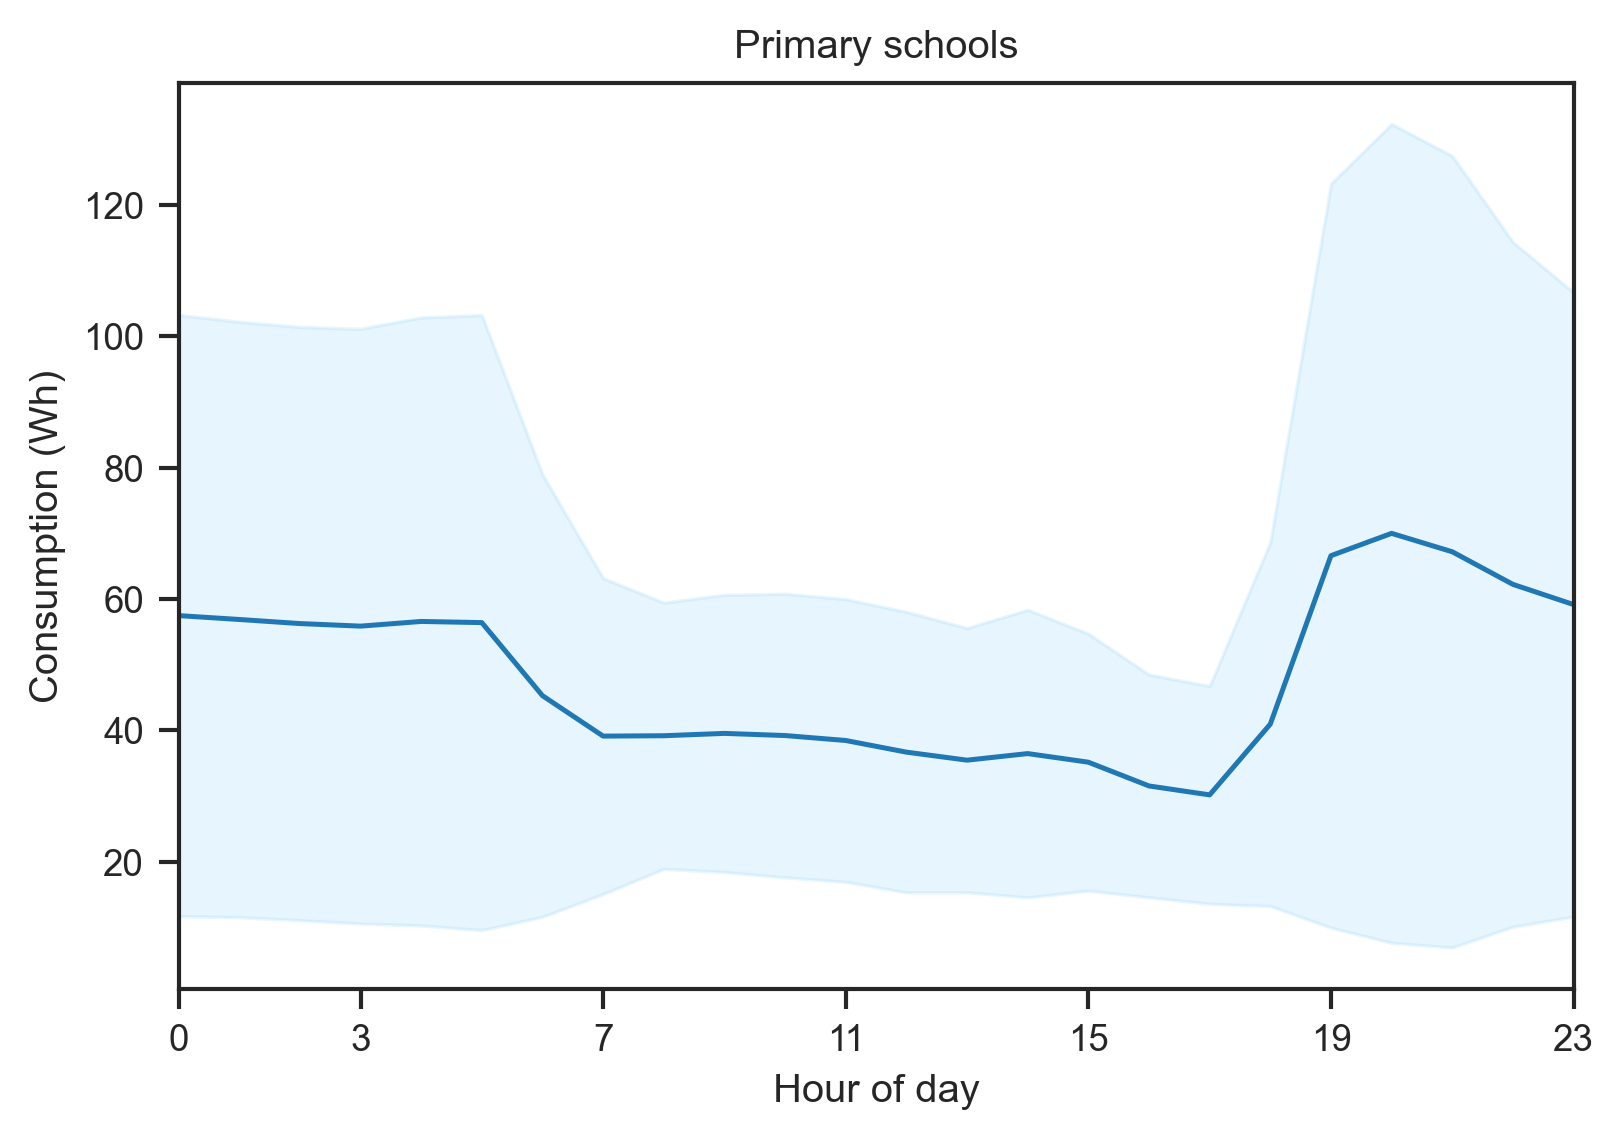

In [5]:
# Reset index to be able to plot it
all_sites = all_sites.reset_index()

# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="tab:blue", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="lightskyblue",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Primary schools")
plt.savefig("Fig_4.4b.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# I didn't even attempted to make it a three pane figure in Seaborn. I probably could but will need to save the df
# separately. See what they say for viva. 

# I then moved figure manually to folder: "PhD thesis images submission"
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)

# For thesis submission I copied plot above as an image directly into word (instead of using the PDF of the plot)
# the plots weren't showing when i converted from word to PDF see: "PhD-Thesis-July-2023_pruebaexport1" PDF